<a href="https://colab.research.google.com/github/MarcoFidelVasquezRivera/K-nearest-Neighbour/blob/Marco/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn #se importa para obtener un dataset
import matplotlib.pyplot as plt#se importa para poder realizar la gráfica con los datos

from sklearn import datasets
#obtiene los datos desde iris
iris = datasets.load_iris()
iris

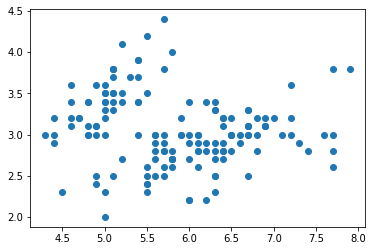

In [2]:
X = iris.data[:, :2]
Y = iris.target
plt.scatter(X[:,0],X[:,1])

In [89]:
import math
#definimos la clase KNN
class KNN:

  def __init__(self,k):
    self.k = k

  def euclidean_distance(self, idx1, idx2, data, axis=0):
    """    Returns the euclidean distance between x and y.

            Preconditions:
                    the dimensions of x and y must be the same

            Parameters:
                    x (n-dimensional numpy array): an array of integers
                    y (n-dimensional numpy array): an array of integers
                    axis (int): axis in which we are working

            Returns:
                    int): distance between x and y on the axis axis.
    """
    return np.linalg.norm( data[idx1] - data[idx2], axis=axis)

  def get_k_nearest_neighbors(self, idx, data):
        """
        Returns the K nearest neighboors of the point.

        Preconditions:
                the dimensions of point and the points on data must be the same

        Parameters:
                idx (int): the index of the point which we are going to get the distance with the other points
                data: an n-dimensional numpy array
        Postcondition:
                the distance of this point to itself is not going to be returned
        Returns:
                idxs (int): an array whit the indexes of the k nearest neighboors of the point with index idx.
        """
        # Initialize Python list
        distances = []
        # Populate list with distances from datapoint in data[idx] with all the other datapoints
        for i in range(0, len(data)):
          distance = self.euclidean_distance(idx, i, data)
          distances.append(distance)
        # Convert python list to numpy array
        distances = np.array(distances)
        unique_distances = np.unique(distances)

        # Create dictionary that maps a distance from data[idx] to the ith data point to its index in data 
        index_distance = {}
        for index, distance in enumerate(distances):
          if index != idx:
            index_distance[distance] = index
        print(index_distance)

        unique_distances = np.delete(unique_distances, idx)
        unique_distances.sort()
        top_k_nearest_neighbors = np.array([ index_distance[distance] for distance in unique_distances])
        return top_k_nearest_neighbors[:self.k]

  def set_point_target(self,indexes,target_data):
    #falta hacer la documentación
    frequency = dict((k,0) for k in target_data)

    for c in range(indexes.size):
      result = target_data[indexes[c]]
      frequency[result]+=1
    
    most_freq = -1
    classfreq = -1
    for clas,freq in frequency.items():
      if freq > most_freq:
        most_freq = freq
        classfreq = clas

    return classfreq

      

In [90]:
X.shape

(150, 2)

In [91]:
#lo probamos haciendo uso de la base de datos cargada anteriormente
knn = KNN(3)
indexes = knn.get_k_nearest_neighbors(4,X)
#error con algunos números, tira indices repetidos
indexes
#target = knn.set_point_target(indexes,Y)
#y[4] = target
#for i in indexes :
#  if i!=4:
#    print(knn.euclidean_distance(point,X[i]))

{0.1414213562373093: 21, 0.608276253029822: 1, 0.49999999999999983: 29, 0.6403124237432851: 3, 0.5000000000000001: 16, 0.4472135954999583: 31, 0.20000000000000018: 26, 0.9219544457292886: 64, 0.5099019513592784: 34, 0.4123105625617664: 10, 0.2828427124746193: 28, 0.632455532033676: 45, 0.9219544457292889: 95, 0.8944271909999156: 14, 1.0630145812734653: 99, 0.7280109889280519: 18, 0.22360679774997858: 46, 0.40000000000000036: 22, 0.31622776601683805: 23, 0.6000000000000001: 25, 0.22360679774997916: 27, 0.5385164807134505: 30, 0.53851648071345: 32, 0.7810249675906655: 33, 0.3999999999999999: 35, 0.5099019513592785: 36, 0.09999999999999964: 37, 0.8485281374238569: 88, 0.22360679774997896: 39, 0.10000000000000009: 43, 1.392838827718412: 53, 0.7211102550927976: 42, 0.5656854249492381: 47, 0.31622776601683783: 48, 0.30000000000000027: 49, 2.039607805437114: 50, 1.456021977856104: 115, 1.9646882704388504: 141, 1.7000000000000002: 54, 1.3341664064126333: 100, 1.2041594578792296: 57, 1.74642491

KeyError: ignored

In [77]:
#lo probamos haciendo uso de una "base de datos" creada por nosotros
testdb_two = np.array([[40.0,30.4],[4.0,5.0],[3.0,8.0],[4.0,10.2],[20.0,0.0],[3.0,8.1]])
knn.get_k_nearest_neighbors(3,testdb_two)





{41.28001937984041: 0, 5.199999999999999: 1, 2.4166091947189137: 2, 18.97472002428494: 4, 2.325940669922601: 5}


array([5, 2, 1])